# KNN Regression


In [1]:
import numpy as np
import pandas as pd
import numpy as np

#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
boston = load_boston()

#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False).fit(X)
X=scaler.transform(X)

In [2]:
X=X[y<50]
y=y[y<50]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=123)

In [3]:
X_train.shape

(343, 13)

In [4]:
#print(boston["DESCR"])

In [5]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()

# n_neighbors: Number of neighbors 
# weight: ‘uniform’ : uniform weights. ‘distance’ : weight points by the inverse of their distance.
# p Power parameter for the Minkowski metric.
# n_job:  number of parallel jobs to run (-1)

parameters = {'n_neighbors': np.arange(4, 20)
              ,'p': [1,2,3]
            }

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3, verbose = 0, scoring ='neg_mean_absolute_error')
#,https://scikit-learn.org/stable/modules/model_evaluation.html 
#with no params it reduces to a CV
#'neg_mean_absolute_error',
#'neg_mean_squared_error'
# 'r2'

gs = gs.fit(X_train,y_train)



In [6]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: -2.663195 using {'n_neighbors': 6, 'p': 1}
-2.734708 (0.168300) with: {'n_neighbors': 4, 'p': 1}
-2.710120 (0.083680) with: {'n_neighbors': 4, 'p': 2}
-2.675896 (0.065782) with: {'n_neighbors': 4, 'p': 3}
-2.689711 (0.126600) with: {'n_neighbors': 5, 'p': 1}
-2.718903 (0.049697) with: {'n_neighbors': 5, 'p': 2}
-2.809146 (0.110487) with: {'n_neighbors': 5, 'p': 3}
-2.663195 (0.133074) with: {'n_neighbors': 6, 'p': 1}
-2.717043 (0.033623) with: {'n_neighbors': 6, 'p': 2}
-2.813350 (0.106031) with: {'n_neighbors': 6, 'p': 3}
-2.700916 (0.141565) with: {'n_neighbors': 7, 'p': 1}
-2.743246 (0.063169) with: {'n_neighbors': 7, 'p': 2}
-2.882988 (0.170374) with: {'n_neighbors': 7, 'p': 3}
-2.683837 (0.133819) with: {'n_neighbors': 8, 'p': 1}
-2.778727 (0.115310) with: {'n_neighbors': 8, 'p': 2}
-2.924009 (0.182554) with: {'n_neighbors': 8, 'p': 3}
-2.720268 (0.132197) with: {'n_neighbors': 9, 'p': 1}
-2.796216 (0.145876) with: {'n_neighbors': 9, 'p': 2}
-2

-2.4846938775510203

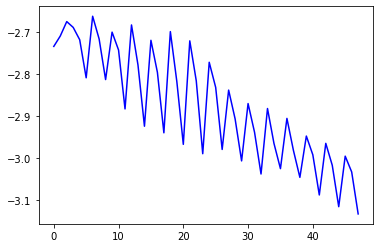

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot (means, color='blue', alpha=1.00)
plt.show()

In [8]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  2.1210884353741495
MSE train:  9.948425655976678
RMSE train:  3.154112498941133
r2:  0.9207035558322156
MAE test:  2.4846938775510203
MSE test:  10.756052532123961
RMSE test:  3.2796421347647002
r2:  0.8935017414165808


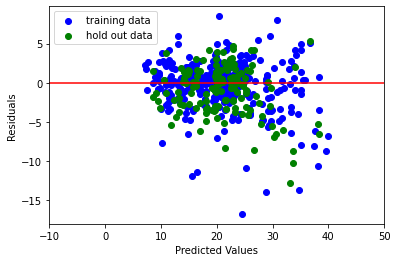

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()